# Project 3 - Real Estate Analysis

## Group 9:
    Max Crooks 22009631
    Ben Mullinger 23010836
    Samantha Morris 23011723

## Introduction:

RealEstateInsight is designed to assist real estate investors, brokers, and market analysts by providing comprehensive market analysis, property value evaluation, and identification of lucrative investment opportunities through an interactive dashboard.




## Problem Domain:

The real estate market is complex, with numerous factors influencing property values and investment potential. RealEstateInsight aims to streamline this complexity by consolidating data and delivering actionable insights, helping users make informed investment decisions.



## Dataset:

It will use the following data sources:

- **Property Listings**: Information from real estate websites and APIs, including prices, square footage, property type, location, and listing dates.
  - [QV](https://qv.co.nz/) (property valuation and historical sales data)
- **Historical Sales Data**: Data on past property sales to analyze trends and price developments.
  - [Real Estate](https://www.realestate.co.nz/insights) (current property listings and market trends)
- **Demographic and Economic Data**: Government database information on population growth, income levels, and employment rates by region.
  - [HUD](https://www.hud.govt.nz/stats-and-insights) (housing supply, affordability, and urban development data)
  - [Stats NZ](https://www.stats.govt.nz/) (demographic, economic, and comprehensive housing data)
- **Geospatial Data**: Maps and location data to assess property values based on geographic and infrastructural developments.
  - [LINZ](https://data.linz.govt.nz/) (geospatial data, including property boundaries and topography)

## Core Features

- **Market Trends Dashboard**: Interactive visualizations displaying current and historical market data, including average prices, sales volumes, and time-on-market trends.
- **Price Prediction Tool**: Machine learning models predicting property prices based on various factors such as location, property features, and market conditions.
- **Investment Hotspot Identification**: Analyzing geographical data to identify areas with high investment potential based on historical price appreciation, demographic trends, and economic growth.
- **Comparative Market Analysis**: Allowing users to compare different regions or properties based on metrics like investment return, risk factors, and market demand.


## Code:

### Market Trends Dashboard:

#### Dataset:

In [42]:
#Data source: https://www.corelogic.co.nz/news-research/reports/house-price-index
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 42)
pd.set_option('display.max_rows', 30)
%matplotlib inline

df.dropna(inplace=True) 

df = pd.read_excel("Corelogic.xlsx")
pd.options.display.float_format = '{:,.2f}'.format
df.rename(columns = {'Territorial authority':'Region'}, inplace = True)
df.rename(columns = {'Average current value':'Average current price'}, inplace = True)
df.rename(columns = {'3 month change %':'3 month change%'}, inplace = True)

df['Average value 3 months ago'] = df['Average current price'] / (1 + df['3 month change%'])
df['Average value 12 months ago'] = df['Average current price'] / (1 + df['12 month change%'])

display(df)

,Region,Average current price,12 month change%,3 month change%,Average value 3 months ago,Average value 12 months ago
0,Far North,"708,341.10",0.03,0.00,"706,152.03","685,845.37"
1,Whangarei,"751,109.62",0.01,0.02,"739,790.82","746,407.26"
2,Kaipara,"840,309.80",0.03,0.01,"834,551.40","817,421.98"
3,Auckland - Rodney,"1,278,765.46",0.01,0.02,"1,252,709.11","1,266,982.53"
4,Rodney - Hibiscus Coast,"1,174,388.03",-0.00,0.01,"1,168,545.30","1,176,387.89"
...,...,...,...,...,...,...
101,NaN,NaN,NaN,NaN,NaN,NaN
102,Auckland Area,"1,290,329.50",-0.02,0.00,"1,289,813.57","1,314,516.60"
103,Wellington Area,"926,261.73",0.03,0.02,"909,526.45","901,997.99"
104,Main Urban Areas,"1,029,960.06",-0.00,0.00,"1,026,265.50","1,030,681.53"


#### Bar plot of average current price per region

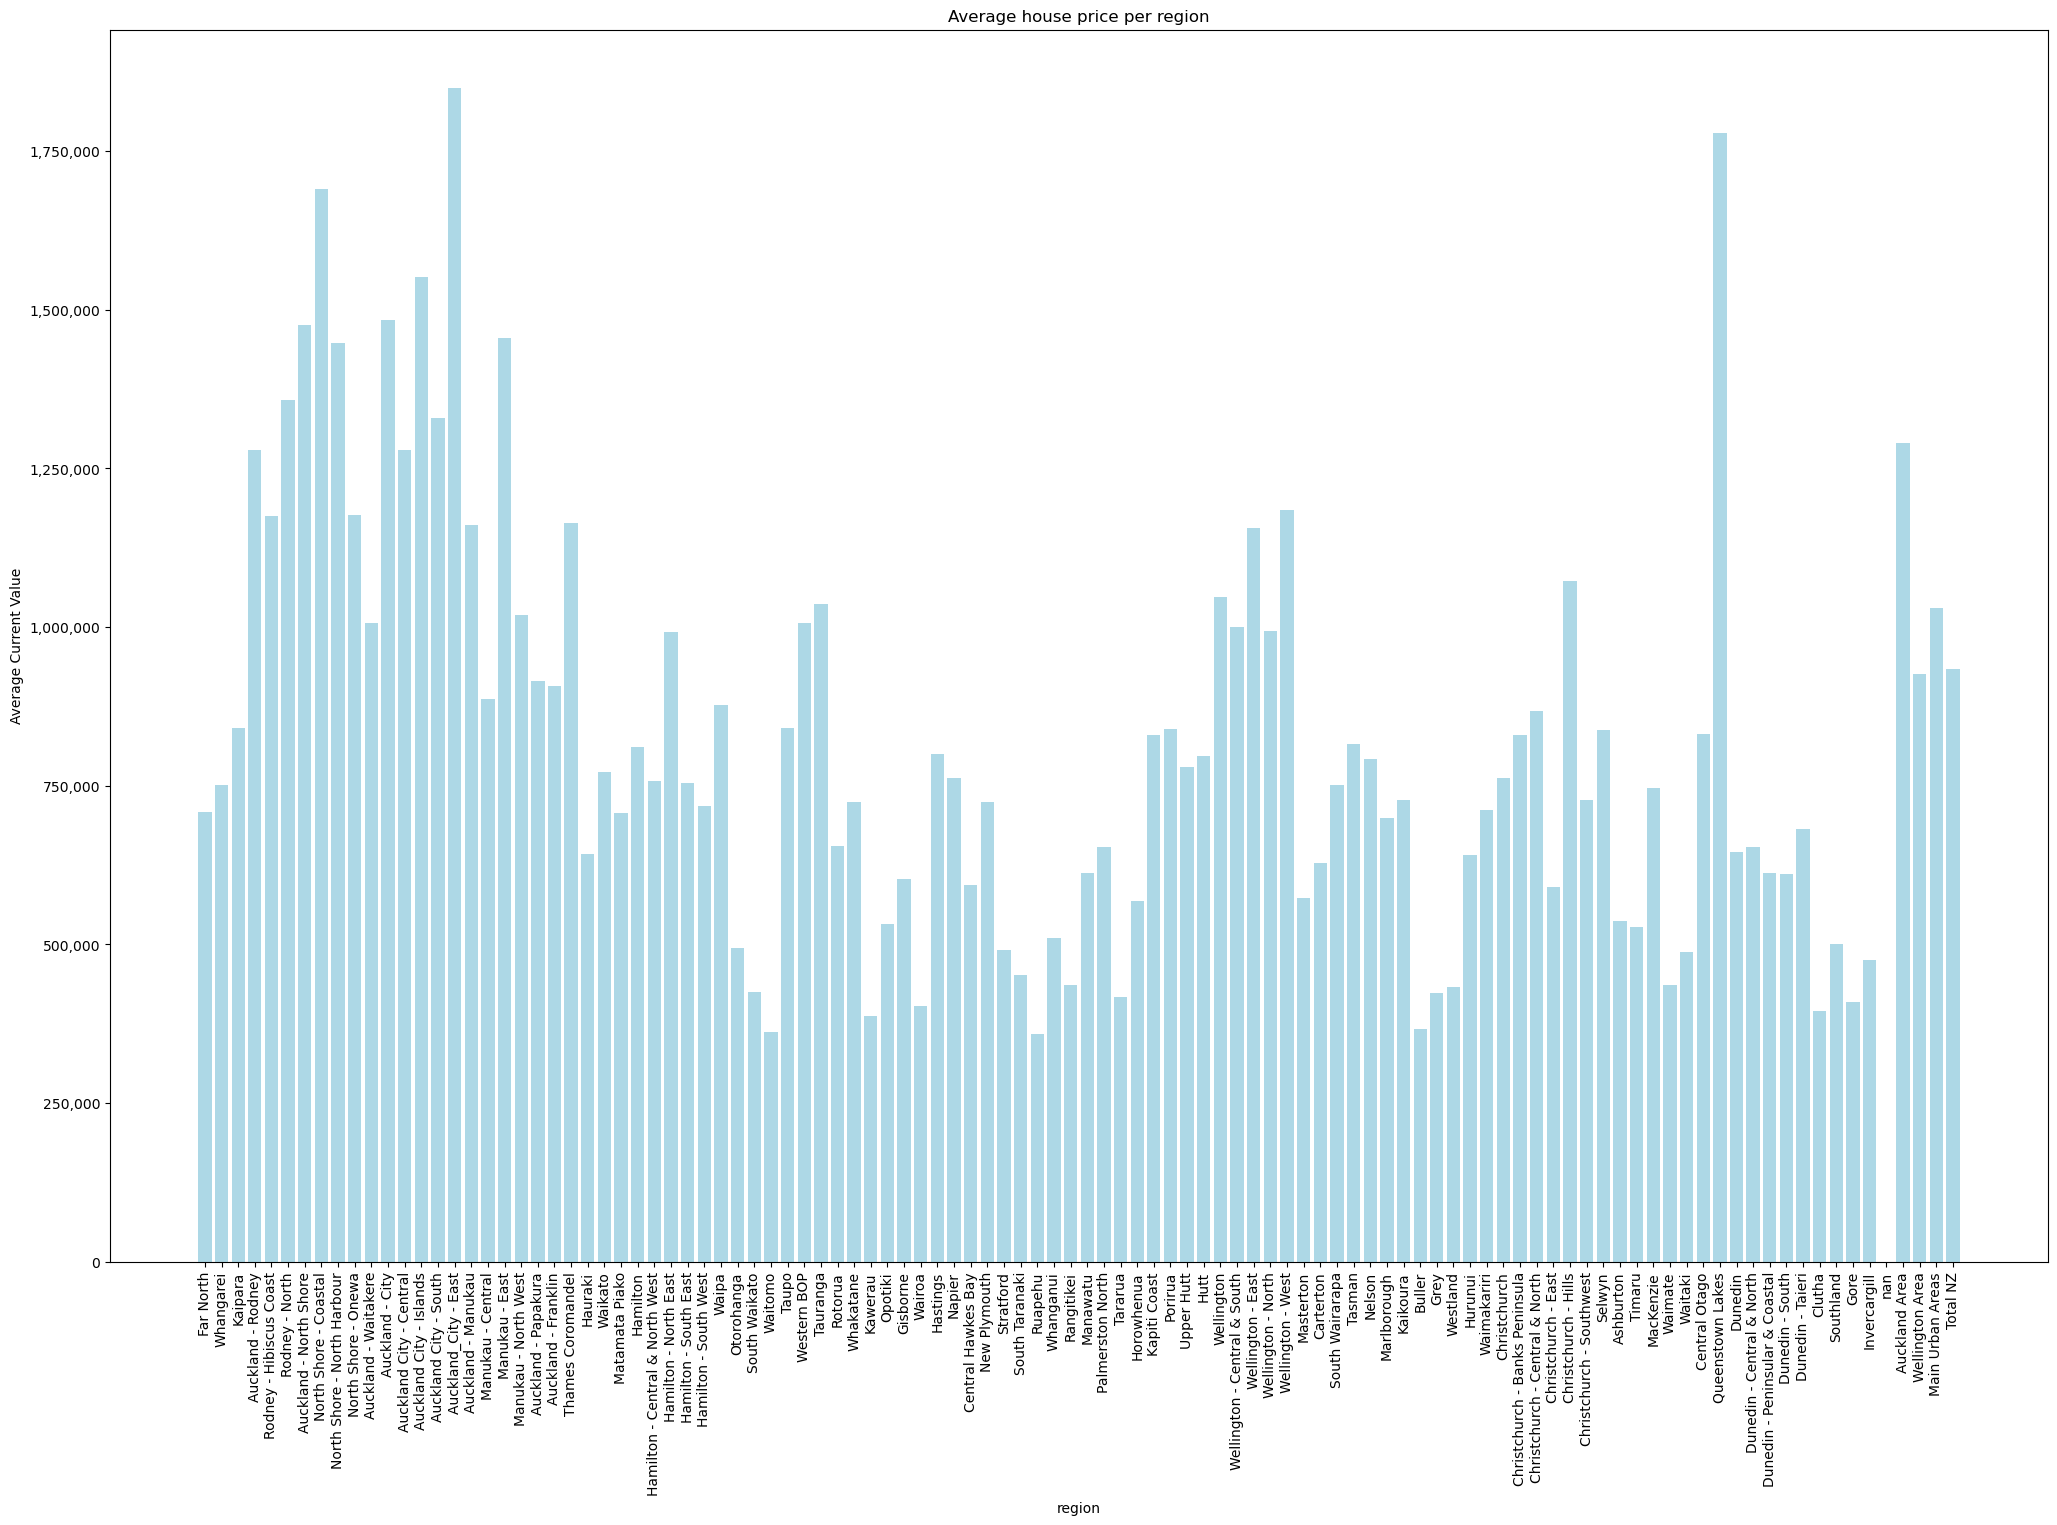

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

pd.set_option('display.max_columns', 42)
pd.set_option('display.max_rows', 30)
%matplotlib inline

df = pd.read_excel(r"Corelogic.xlsx")
pd.options.display.float_format = '{:,.2f}'.format

df['Territorial authority'] = df['Territorial authority'].astype(str)

plt.figure(figsize=(25, 16))
plt.bar(df['Territorial authority'], df['Average current value'], color='lightblue')
plt.xlabel('region')
plt.ylabel('Average Current Value')
plt.title('Average house price per region')
plt.xticks(rotation=90)

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.show()

#### Distribution of property prices

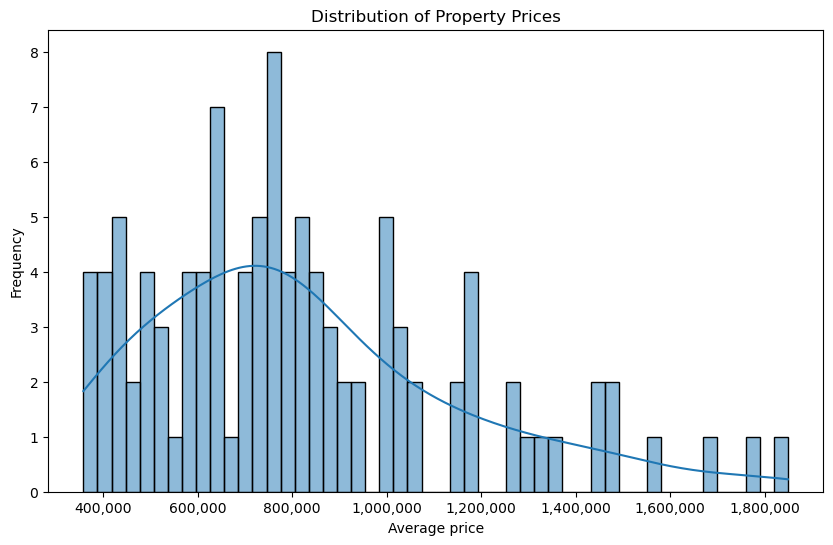

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

pd.set_option('display.max_columns', 42)
pd.set_option('display.max_rows', 30)
%matplotlib inline

df = pd.read_excel(r"Corelogic.xlsx")
pd.options.display.float_format = '{:,.2f}'.format

plt.figure(figsize=(10, 6))
sns.histplot(df['Average current value'], bins=50, kde=True)


plt.title('Distribution of Property Prices')
plt.xlabel('Average price')
plt.ylabel('Frequency')

plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()

### Price Prediction Tool:

Mean Squared Error: 70635615049.59409
R-squared: 0.03788586240335823
Cross-Validated MSE: 224805850309.86075


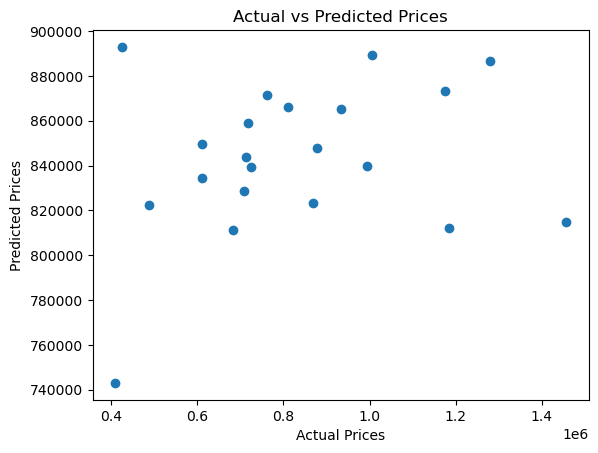

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df.dropna(inplace=True) 
X = X.reindex(y.index)

x = df[['3 month change%', '12 month change%']]  
y = df['Average current price'] 

X = X.fillna(X.mean())
y = y.fillna(y.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

cv_scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f"Cross-Validated MSE: {cv_mse}")

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


### Investment Hotspot Identification:

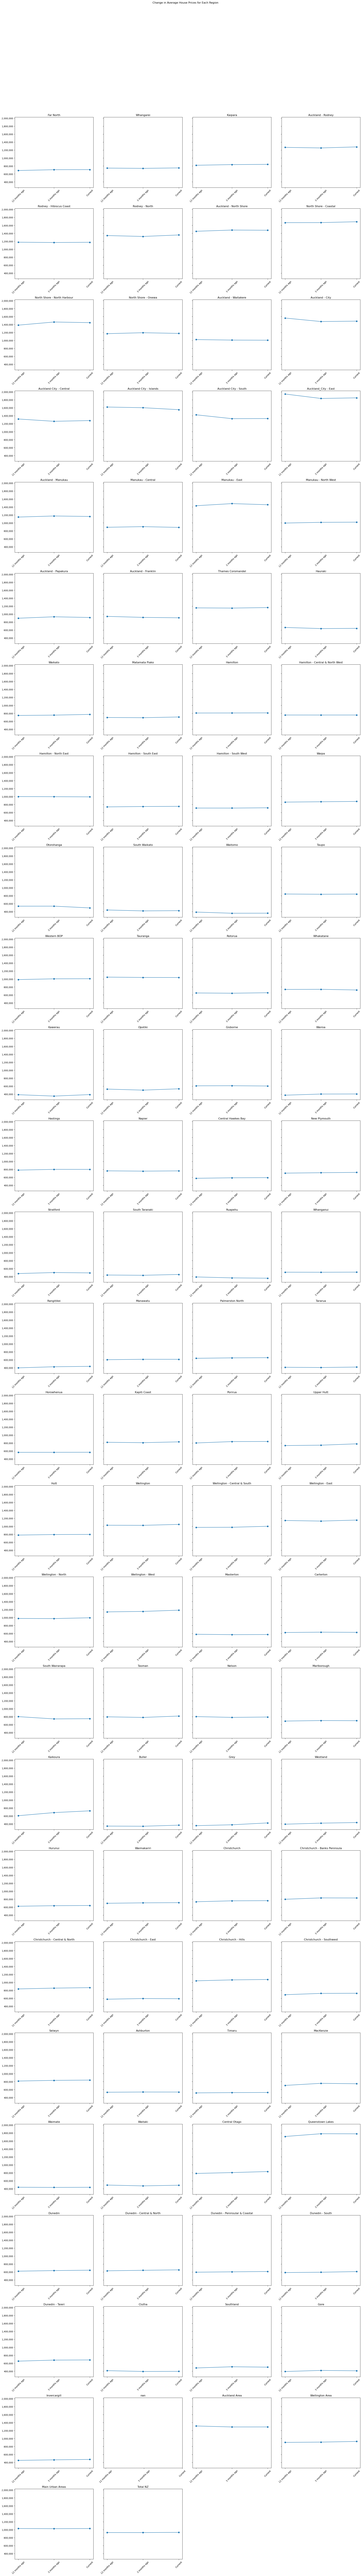

In [44]:
num_regions = len(df)
num_cols = 4
num_rows = (num_regions + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(22, 6 * num_rows), sharey=True)
axes = axes.flatten()

for i, (index, row) in enumerate(df.iterrows()):
    x = ['12 months ago', '3 months ago', 'Current']
    y = [row['Average value 12 months ago'], row['Average value 3 months ago'], row['Average current price']]
    ax = axes[i]
    ax.plot(x, y, marker='o')
    ax.set_title(row['Region'])
    ax.set_xticks(x)
    ax.set_xticklabels(x, rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Change in Average House Prices for Each Region')
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.show()


### Comparative Market Analysis:

#### Dataset:

In [ ]:
import pandas as pd

excel_file = [
    'NZrealestate.xlsx'
]

dataframes = [] 

for file in excel_file:
    df = pd.read_excel(file)
    dataframes.append(df)

df1 = dataframes[0]  # NZrealestate.xlsx

df1


####  Mean prices for homes with different numbers of bedrooms

In [ ]:
import numpy as np

mean_bedroomsNaN = df.loc[df.bedrooms.isna(), 'price'].mean()
mean_bedrooms2 = df.loc[df.bedrooms == 2, 'price'].mean()
mean_bedrooms3 = df.loc[df.bedrooms == 3, 'price'].mean()
mean_bedrooms4 = df.loc[df.bedrooms == 4, 'price'].mean()
mean_bedrooms5 = df.loc[df.bedrooms == 5, 'price'].mean()

meanDataBed = [["NaN", mean_bedroomsNaN], ["2", mean_bedrooms2], ["3", mean_bedrooms3], ["4", mean_bedrooms4], ["5", mean_bedrooms5]]
dfMeanBed = pd.DataFrame(meanDataBed, columns=["bedrooms", "AVG price"])

#### Plot average price by number of bedrooms

In [ ]:
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20

dfMeanBed.sort_index(ascending=True).plot.bar(x="bedrooms")
plt.xlabel("Number of bedrooms")
plt.ylabel("Price of house (NZD, millions)")
plt.show()

#### Mean prices for homes with different numbers of bathrooms

In [14]:
import numpy as np

mean_bathroomsNaN = df.loc[df.bathrooms.isna(), 'price'].mean()
mean_bathrooms1 = df.loc[df.bathrooms == "1", 'price'].mean()
mean_bathrooms2 = df.loc[df.bathrooms == "2", 'price'].mean()
mean_bathrooms3 = df.loc[df.bathrooms == "3", 'price'].mean()
mean_bathrooms4 = df.loc[df.bathrooms == "4", 'price'].mean()
mean_bathrooms7 = df.loc[df.bathrooms == "7", 'price'].mean()

meanDataBath = [["NaN", mean_bathroomsNaN], ["1", mean_bathrooms1], ["2", mean_bathrooms2], ["3", mean_bathrooms3], ["4", mean_bathrooms4], ["7", mean_bathrooms7]]
dfMeanBath = pd.DataFrame(meanDataBath, columns=["bathrooms", "AVG price"])

#### Plot average price by number of bathrooms

In [ ]:
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20

dfMeanBath.sort_index(ascending=True).plot.bar(x="bathrooms")
plt.xlabel("Number of bathrooms")
plt.ylabel("Price of house (NZD, millions)")
plt.show()

#### Modified dataframe for land size and corresponding prices

In [ ]:
df3 = df.drop_duplicates(subset=["address"])

# Convert land size to square meters
df3["land_sizem2"] = df3["land_size"]
for i, land_size in enumerate(df3["land_size"]):
    if isinstance(land_size, float):
        continue
    elif "m2" in land_size:
        df3.at[i, "land_sizem2"] = int(land_size.replace("m2", ""))
    elif "ha" in land_size:
        df3.drop(index=i, inplace=True)

# Convert specific land size entry
df3.at[38, "land_sizem2"] = int(df3.at[38, "land_size"].replace("m2", ""))

# Display the 
display(df3)

#### Plot land size vs. price

In [ ]:
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20

plt.scatter(df3["land_sizem2"], df3["price"], s=50)
plt.xlabel("Land size (m2)")
plt.ylabel("Price ($NZD)")
plt.show()